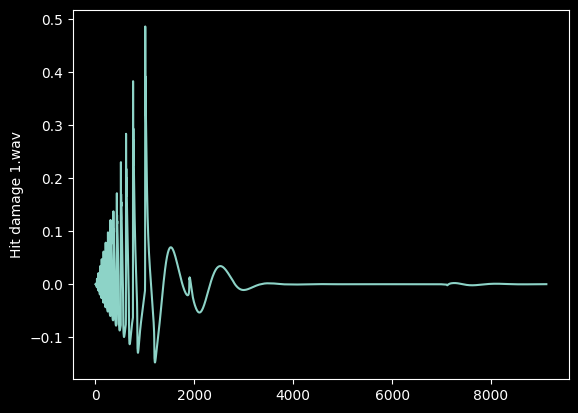

In [2]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'Hit damage 1.wav'
data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [3]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
desired_sample_rate = 11000.0
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[8.2884282e-05 5.8113632e-04 1.1945331e-03 ... 5.8530353e-05 5.9965361e-05
 5.8856207e-05]
length 2274
max value 0.39963022
min value -0.1483243
value range 0.5479545


In [ ]:
m68code = "/*    File "+soundfile+ "\r\n *    Sample rate "+str(int(desired_sample_rate)) +" Hz\r\n */\r\n"
m68code += "#define "+ soundfile.replace(' ', '_').replace('.','_').upper() +"_DATA_LENGTH "+str(len(data_out))+" \r\n\r\n"
m68code += "static uint8_t "+ soundfile.replace(' ', '_').replace('.','_').upper() +"_DATA[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 255))
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*    File Hit damage 1.wav
 *    Sample rate 11000 Hz
 */
#define HIT_DAMAGE_1_WAV_DATA_LENGTH 2274 

uint8_t HIT_DAMAGE_1_WAV_DATA[] = {
    69,69,69,69,68,67,66,67,72,71,71,68,65,64,62,72,
    75,73,72,66,63,62,59,73,80,75,75,67,61,60,56,63,
    84,80,79,76,66,59,56,55,51,79,88,83,81,77,64,56,
    52,52,46,61,95,88,88,82,77,62,52,51,46,47,42,89,
    99,93,92,85,79,60,51,47,44,41,42,39,95,107,99,99,
    91,86,74,55,46,42,40,36,39,31,64,122,107,112,100,100,
    87,84,64,47,39,37,33,33,31,33,31,41,119,127,120,117,
    108,103,93,86,75,51,38,33,30,28,29,27,31,27,36,22,
    85,154,132,139,124,122,109,104,93,86,77,64,38,29,25,22,
    23,21,25,22,28,24,32,25,39,21,109,176,153,158,142,138,
    125,119,107,101,92,86,77,71,58,33,21,19,15,17,16,19,
    18,23,21,26,25,30,28,34,30,37,32,42,31,63,200,194,
    188,180,167,157,144,136,123,118,107,103,93,90,82,80,72,69,
    63,58,51,30,12,11,7,9,9,12,13,15,17,19,22,23,
    26,27,30,30,33,33,36,36,39,38,42,41,45,44,47,46,
    50,49,52,52,55,56,57,60,